<a href="https://colab.research.google.com/github/Pranavla/Email_Spam_Detection/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# **Importing the datasets**

Importing the training dataset and printing the same

In [ ]:
df_train=pd.read_csv('/content/SMS_train.csv',encoding='ISO-8859-1')
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


We can understand that the dataset is having 3 columns with title 'S. No.' , 'Message_body', 'Label' and having 957 rows

## Importing and printing the testing dataset 

In [ ]:
df_test=pd.read_csv('/content/SMS_test.csv',encoding='ISO-8859-1')
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In this dataset also there are 3 columns as the same name of previous dataset and 125 no: of rows. Since both datasets are having same columns it is better to combine both and work on the combined dataset, because the combined dataset having more data ,the overall training and learing of machine increases.   

## combining both train and test datasets

In [ ]:
df=pd.concat([df_train,df_test],ignore_index=True,axis=0)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


Here we got the combined dataset which is having 3 columns and 1082 rows.Concat is the function used for combining the datasets,"ignore_index" is used for ignoring the serial number of both dataset and to show only the new dataset index.

# **Pre-processing**

Serial number columns is not required so dropping the serial number column.

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


## Coutning the number of missing values

In [ ]:
df.isna().sum()

Message_body    0
Label           0
dtype: int64

## Finding the unique values in label column

In [ ]:
df['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

## Representing the count of spam and non spam using a plot diagram

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


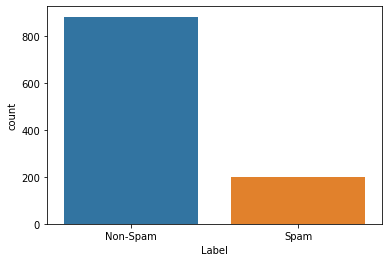

In [ ]:
sns.countplot('Label',data=df)

Converting the spam and non-spam in label column into 1,0 using map function

In [ ]:
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


Collecting the data from message body column and storing it in msg variable

In [ ]:
msg=df.Message_body
msg

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

Removing the special characters

In [ ]:
msg=msg.str.replace('[^A-Za-z-0-9]+', ' ')
msg

<ipython-input-80-4feb8d75dd28>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^A-Za-z-0-9]+', ' ')


0                               Rofl Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity was in mood for that So any other suggest...
3                      Will b going to esplanade fr home 
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear You read something fo...
1079    Sun ah Thk mayb can if dun have anythin on Thk...
1080    SYMPTOMS when U are in love 1 U like listening...
1081     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Stemming

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:[stemmer.stem(i.lower())  for i in word_tokenize(x)]).apply(lambda x:' '.join(x))
msg

0                                 rofl it true to it name
1       the guy did some bitch but i act like i d be i...
2          piti was in mood for that so ani other suggest
3                           will b go to esplanad fr home
4       this is the 2nd time we have tri 2 contact u u...
                              ...                        
1077    7 wonder in my world 7th you 6th ur style 5th ...
1078       tri to do someth dear you read someth for exam
1079    sun ah thk mayb can if dun have anythin on thk...
1080    symptom when u are in love 1 u like listen son...
1081        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

## Applying stopwords

In this we are tokenizing all words and comparing it with stopwords .If it is a stopword, then it is removed.

In [ ]:
from nltk.stem.snowball import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
msg

0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                   b go esplanad fr home
4       2nd time tri 2 contact u u 750 pound prize 2 c...
                              ...                        
1077    7 wonder world 7th 6th ur style 5th ur smile 4...
1078                     tri someth dear read someth exam
1079    sun ah thk mayb dun anythin thk book e lesson ...
1080    symptom u love 1 u like listen song 2 u get st...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

Removing words less than 3 letters as that does not contribute largely in the analysis

In [ ]:
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if len(i)>=3]).apply(lambda x:" ".join(x))
msg

0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                           esplanad home
4       2nd time tri contact 750 pound prize claim eas...
                              ...                        
1077    wonder world 7th 6th style 5th smile 4th perso...
1078                     tri someth dear read someth exam
1079    sun thk mayb dun anythin thk book lesson pilat...
1080    symptom love like listen song get stop see nam...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

## Converting into Numeric value

In this we are using TF-IDF(Term frequency-Inverse document frequency) vectorization technique.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data_vec=vec.fit_transform(msg)

In [ ]:
print(data_vec)

  (0, 1757)	0.5086856793431559
  (0, 2624)	0.5352804139572925
  (0, 2163)	0.6743246681420617
  (1, 1122)	0.1977601804079742
  (1, 1167)	0.32809784984076795
  (1, 2763)	0.22799692523276513
  (1, 1790)	0.26514476216742267
  (1, 970)	0.30392006451010634
  (1, 2349)	0.2751324774651613
  (1, 619)	0.2751324774651613
  (1, 1395)	0.3187189191538061
  (1, 1537)	0.2174075457753962
  (1, 333)	0.35437558793533497
  (1, 543)	0.3752334020731641
  (1, 1237)	0.26826339572857744
  (2, 2448)	0.5165656915002457
  (2, 402)	0.36716239650585775
  (2, 1713)	0.5469696796701571
  (2, 1943)	0.5469696796701571
  (3, 1310)	0.5461172911588754
  (3, 997)	0.8377087228251189
  (4, 1767)	0.28957257241482465
  (4, 605)	0.27747991548849266
  (4, 1679)	0.23896382245948036
  (4, 1915)	0.23495747859474786
  :	:
  (1079, 1865)	0.2706898396742334
  (1079, 1729)	0.2706898396742334
  (1079, 2454)	0.26153957460502464
  (1079, 1526)	0.24774213284441401
  (1079, 564)	0.2374366876682329
  (1079, 2545)	0.49548426568882803
  (1079, 

In [ ]:
data_vec.shape

(1082, 2877)

Converting the data into an array and asssiging into variable y

In [ ]:
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

splitting the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.30,random_state=42)

# Creating the model

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
svm_model=svm.SVC()
NB_model=MultinomialNB()
RF_model=RandomForestClassifier()
AB_model=AdaBoostClassifier()
Ist_model=[svm_model,NB_model,RF_model,AB_model]

Prediction

SVC()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       269
           1       1.00      0.59      0.74        56

    accuracy                           0.93       325
   macro avg       0.96      0.79      0.85       325
weighted avg       0.93      0.93      0.92       325

****************************************************************************************************
****************************************************************************************************
MultinomialNB()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       269
           1       1.00      0.62      0.77        56

    accuracy                           0.94       325
   macro avg       0.96      

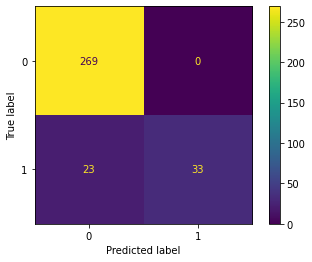

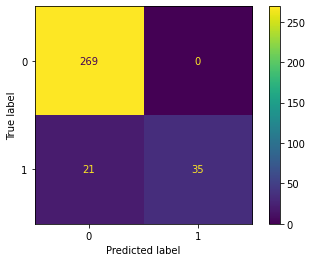

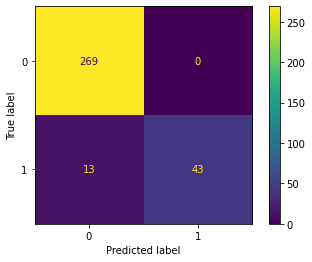

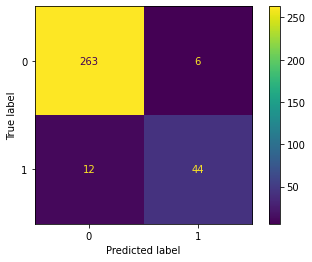

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
for i in Ist_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*"*100)
  print(classification_report(y_test,y_pred))
  print('*'*100)
  print('*'*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))